# Set up

1. Download and unzip AML dataset from: http://acgt.cs.tau.ac.il/multi_omic_benchmark/download.html (Rappoport & Shamir, 2019).
2. Install required packages (see set_up.R for instructions if needed)

In [1]:
library(tidyverse)
library(ggalluvial)
library(ComplexHeatmap)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Загрузка требуемого пакета: grid

ComplexHeatmap version 2.8.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressP

In [2]:
# Specify path to directory with downloaded data
data_dir_path = "gbm"
stopifnot(file.exists(file.path(data_dir_path, 'exp')) & file.exists(file.path(data_dir_path, 'methy')) & 
          file.exists(file.path(data_dir_path, 'mirna')))

In [3]:
# Inrease plot resolution in this notebook
options(repr.plot.res=200)

# Glioblastoma multiforme (GBM) Dataset

## (1) Closer look at the data 

In [4]:
# load gene expression data as data.frame
data_exp <- read.table(file.path(data_dir_path, 'exp'))
dim(data_exp)
head(data_exp)

[1] 12042   538

TCGA.02.0001.01 TCGA.02.0003.01 TCGA.02.0004.01 TCGA.02.0007.01
AACS     6.500551        6.539245        7.377848        7.186891      
FSTL1    8.729663        9.794400       12.059550        4.945053      
ELMO2    5.511362        6.213981        7.051738        5.230444      
CREB3L1  4.882953        4.836276        6.112444        5.818606      
RPS11   10.984784       10.811245       10.436374       10.477304      
PNMA1    7.535193        6.997933        9.132060        8.356117      
        TCGA.02.0009.01 TCGA.02.0010.01 TCGA.02.0011.01 TCGA.02.0014.01
AACS     7.675038        7.996010        8.355122        6.840142      
FSTL1   10.840095        8.931571        4.240622        7.738483      
ELMO2    6.620676        7.552416        6.707334        7.262258      
CREB3L1  5.333213        6.087341        4.865492        4.524546      
RPS11   10.637267       11.001533       10.685883       10.661348      
PNMA1    6.942901        8.044375        7.209407       10.298532      
        TCGA.02.0015.01 TCGA.02.0016.01 ⋯ TCGA.76.4932.01 TCGA.76.4934.01
AACS     6.349118        6.290033       ⋯  5.896504        6.347784      
FSTL1   10.756458        9.648899       ⋯  8.114789        8.874452      
ELMO2    7.118661        7.917984       ⋯  7.382726        6.819251      
CREB3L1  4.825061        4.831104       ⋯  4.680993        5.636862      
RPS11   10.284938       10.252175       ⋯ 10.930178       10.400120      
PNMA1    9.741650        9.381481       ⋯  9.772501        8.763057      
        TCGA.76.4935.01 TCGA.76.6191.01 TCGA.76.6192.01 TCGA.76.6193.01
AACS     6.192691        7.221835        7.539261        6.907754      
FSTL1    9.920456       10.136264        9.832820       11.091805      
ELMO2    6.675723        7.713521        7.645800        7.887724      
CREB3L1  5.331521        5.062153        5.553267        4.687781      
RPS11   10.351366       10.636917       10.565529       10.475093      
PNMA1   10.044907       10.770442       10.539745        9.138319      
        TCGA.76.6282.01 TCGA.76.6285.01 TCGA.81.5910.01 TCGA.87.5896.01
AACS     7.007554        7.676325        7.105246        7.230189      
FSTL1   10.789466        9.682591        9.847404       10.437573      
ELMO2    7.569806        7.019757        7.533500        7.956918      
CREB3L1  5.366983        4.685657        6.154893        6.813070      
RPS11   10.572989       10.439194       10.685288       10.315563      
PNMA1    9.438187       10.204201       10.220633       11.417741

In [5]:
# load methylation data as data.frame
data_met <- read.table(file.path(data_dir_path, 'methy'))
dim(data_met)
head(data_met)

[1] 5000  285

TCGA.02.0001.01 TCGA.02.0003.01 TCGA.02.0006.01 TCGA.02.0007.01
cg00000292 0.82606340      0.69660990      0.63645790      0.82671180     
cg00002426 0.17865935      0.55594772      0.29678326      0.08816491     
cg00005847 0.38191885      0.85162989      0.50964984      0.40420562     
cg00015770 0.04578244      0.03510996      0.06024162      0.21856372     
cg00027083 0.02554621      0.87970085      0.16764694      0.01934333     
cg00029931 0.07365109      0.06326153      0.36582282      0.39360929     
           TCGA.02.0009.01 TCGA.02.0010.01 TCGA.02.0011.01 TCGA.02.0014.01
cg00000292 0.8360435       0.68713671      0.05456246      0.66331163     
cg00002426 0.1946595       0.91209281      0.06720871      0.06225422     
cg00005847 0.6352697       0.87632058      0.05402352      0.87190491     
cg00015770 0.3672959       0.11412584      0.05914311      0.11322785     
cg00027083 0.8823921       0.01986663      0.04162533      0.01945786     
cg00029931 0.5414120       0.02525295      0.04724050      0.02370935     
           TCGA.02.0021.01 TCGA.02.0024.01 ⋯ TCGA.32.4213.01 TCGA.32.4719.01
cg00000292 0.73345621      0.15786178      ⋯ 0.56757201      0.62880037     
cg00002426 0.13449171      0.17528103      ⋯ 0.26861949      0.20976715     
cg00005847 0.10862978      0.86461483      ⋯ 0.54509559      0.86252989     
cg00015770 0.06271605      0.03321541      ⋯ 0.06524404      0.12538192     
cg00027083 0.84631628      0.10833143      ⋯ 0.20699429      0.79292484     
cg00029931 0.45255953      0.08131718      ⋯ 0.20440922      0.02977437     
           TCGA.41.2571.01 TCGA.41.2572.01 TCGA.41.2573.01 TCGA.41.2575.01
cg00000292 0.61289693      0.59769668      0.40004478      0.06472325     
cg00002426 0.09333825      0.13181123      0.10028727      0.06898570     
cg00005847 0.68552078      0.57776690      0.47051580      0.61481110     
cg00015770 0.42336948      0.72212812      0.47588762      0.39171474     
cg00027083 0.34983506      0.78648326      0.62377268      0.15266781     
cg00029931 0.02344225      0.02055374      0.01932787      0.02629497     
           TCGA.41.3392.01 TCGA.41.3393.01 TCGA.41.3915.01 TCGA.41.4097.01
cg00000292 0.31567828      0.7044217       0.47509112      0.8004146      
cg00002426 0.05402982      0.2865876       0.19203306      0.3133018      
cg00005847 0.16549599      0.6157836       0.53128748      0.4347840      
cg00015770 0.41272676      0.1126595       0.11799490      0.2785640      
cg00027083 0.54754639      0.4863106       0.14057559      0.3248583      
cg00029931 0.02144909      0.4089981       0.02031653      0.4733912

In [6]:
# load microRNA expression data as data.frame
data_mirna <- read.table(file.path(data_dir_path, 'mirna'))
dim(data_mirna)
head(data_mirna)

[1] 534 575

TCGA.02.0001.01 TCGA.02.0003.01 TCGA.02.0004.01
ebv-miR-BART1-3p  5.855126        5.801614        5.771332       
ebv-miR-BART1-5p  5.799428        5.790478        5.758764       
ebv-miR-BART10    5.862059        5.818763        5.825401       
ebv-miR-BART11-3p 5.608860        5.613089        6.093861       
ebv-miR-BART11-5p 5.812956        5.768700        5.735270       
ebv-miR-BART12    5.932238        5.870240        5.770635       
                  TCGA.02.0006.01 TCGA.02.0007.01 TCGA.02.0009.01
ebv-miR-BART1-3p  5.763649        5.818828        5.766792       
ebv-miR-BART1-5p  5.800184        5.800582        5.812545       
ebv-miR-BART10    5.831836        5.818181        5.888331       
ebv-miR-BART11-3p 5.670716        5.585730        5.948601       
ebv-miR-BART11-5p 5.744179        5.785541        5.803021       
ebv-miR-BART12    5.843112        5.897554        5.935245       
                  TCGA.02.0010.01 TCGA.02.0011.01 TCGA.02.0014.01
ebv-miR-BART1-3p  5.830012        5.694577        5.759589       
ebv-miR-BART1-5p  5.762413        5.781372        5.753567       
ebv-miR-BART10    5.805194        5.826315        5.824671       
ebv-miR-BART11-3p 5.976939        5.852204        5.851923       
ebv-miR-BART11-5p 5.766500        5.706884        5.703376       
ebv-miR-BART12    5.866709        5.826908        5.798724       
                  TCGA.02.0015.01 ⋯ TCGA.76.6656.01 TCGA.76.6657.01
ebv-miR-BART1-3p  5.721678        ⋯ 5.712632        5.694990       
ebv-miR-BART1-5p  5.784598        ⋯ 5.727255        5.722858       
ebv-miR-BART10    5.822451        ⋯ 5.803882        5.801242       
ebv-miR-BART11-3p 5.810710        ⋯ 5.934556        5.920896       
ebv-miR-BART11-5p 5.739655        ⋯ 5.678864        5.676394       
ebv-miR-BART12    5.842102        ⋯ 5.902813        5.864239       
                  TCGA.76.6660.01 TCGA.76.6661.01 TCGA.76.6662.01
ebv-miR-BART1-3p  5.698417        5.719659        5.668525       
ebv-miR-BART1-5p  5.708546        5.697037        5.705371       
ebv-miR-BART10    5.792297        5.736406        5.768526       
ebv-miR-BART11-3p 5.940554        5.898606        5.937124       
ebv-miR-BART11-5p 5.661590        5.715214        5.682542       
ebv-miR-BART12    5.715566        5.773861        5.780002       
                  TCGA.76.6663.01 TCGA.76.6664.01 TCGA.81.5910.01
ebv-miR-BART1-3p  5.684801        5.734061        5.720782       
ebv-miR-BART1-5p  5.681921        5.674293        5.708005       
ebv-miR-BART10    5.716620        5.711762        5.935674       
ebv-miR-BART11-3p 5.960253        5.954465        5.960937       
ebv-miR-BART11-5p 5.669467        5.667814        5.680227       
ebv-miR-BART12    5.710794        5.692067        6.110841       
                  TCGA.81.5911.01 TCGA.87.5896.01
ebv-miR-BART1-3p  5.719152        5.794120       
ebv-miR-BART1-5p  5.680210        5.762432       
ebv-miR-BART10    5.728364        5.727276       
ebv-miR-BART11-3p 5.857153        6.050409       
ebv-miR-BART11-5p 5.730056        5.782263       
ebv-miR-BART12    5.814868        5.737058

**Warm up exercise**:
1. How many samples and features are in each data matrix?
2. What type of biological samples are in this dataset? (Hint: look up the TCGA barcodes)
3. What do values in each data matrix represent?

In [9]:
tibble(sample = c(colnames(data_exp), colnames(data_met), colnames(data_mirna))) %>%
    distinct() %>%
    separate(sample, c('tcga', 'tss', 'participant', 'st'), sep="\\.") %>%
    group_by(tss) %>%
    summarise(nsample=n())

tss nsample
1  02   93    
2  06  154    
3  08   47    
4  12   58    
5  14   44    
6  15    5    
7  16   14    
8  19   39    
9  26   14    
10 27   17    
11 28   34    
12 32   26    
13 41   10    
14 74    6    
15 76   24    
16 81    2    
17 87    1

## (2) TCGA Subtypes

How many uniques samples are in our dataset? 

In [10]:
tibble(sample = colnames(data_exp), layer="exp") %>%
    full_join(tibble(sample = colnames(data_met), layer="met"), by = c("sample", "layer")) %>%
    full_join(tibble(sample = colnames(data_mirna), layer="mirna"), by = c("sample", "layer")) %>%
    spread(layer,layer) %>%
    mutate(layers=paste(exp, met, mirna, sep=",")) %>%
    group_by(layers) %>%
    summarise(nsample=n())

layers        nsample
1 exp,met,mirna 274    
2 exp,met,NA      4    
3 exp,NA,mirna  255    
4 exp,NA,NA       5    
5 NA,met,mirna    3    
6 NA,met,NA       4    
7 NA,NA,mirna    43

Inspect the file with **known TCGA subtypes** (*AML_subtypes.tsv* in the *TCGA_subtypes* directory): 
1. How many samples do not have subtype information available?
2. How many different classifications/subtypes are there?
3. "Subtype_Selected" denotes the most commonly used classification. Which data type this classification is based on? 

In [60]:
subtypes <- read_tsv("TCGA_subtypes/GBM_subtypes.tsv", show_col_types = FALSE)
dim(subtypes)
head(subtypes)

[1] 588   5

sample_codes    samples      Subtype_DNAmeth Subtype_mRNA Subtype_other   
1 TCGA.02.0001.01 TCGA-02-0001 LGm5            LGr4         Mesenchymal-like
2 TCGA.02.0003.01 TCGA-02-0003 LGm5            LGr4         Mesenchymal-like
3 TCGA.02.0004.01 TCGA-02-0004 NA              LGr4         NA              
4 TCGA.02.0007.01 TCGA-02-0007 LGm4            NA           Classic-like    
5 TCGA.02.0009.01 TCGA-02-0009 LGm4            LGr4         Classic-like    
6 TCGA.02.0010.01 TCGA-02-0010 LGm1            LGr4         G-CIMP-low

In [61]:
subtypes %>%
    gather(classification, subtype, -sample_codes, -samples) %>%
    group_by(classification, subtype) %>%
    summarise(n=n())

`summarise()` has grouped output by 'classification'. You can override using the `.groups` argument.



classification  subtype          n  
1  Subtype_DNAmeth LGm1              17
2  Subtype_DNAmeth LGm2              11
3  Subtype_DNAmeth LGm3               3
4  Subtype_DNAmeth LGm4             121
5  Subtype_DNAmeth LGm5             196
6  Subtype_DNAmeth LGm6              48
7  Subtype_DNAmeth NA               192
8  Subtype_mRNA    LGr1              79
9  Subtype_mRNA    LGr2              11
10 Subtype_mRNA    LGr3              37
11 Subtype_mRNA    LGr4             397
12 Subtype_mRNA    NA                64
13 Subtype_other   Classic-like     118
14 Subtype_other   Codel              1
15 Subtype_other   G-CIMP-high       13
16 Subtype_other   G-CIMP-low        13
17 Subtype_other   LGm6-GBM          39
18 Subtype_other   Mesenchymal-like 162
19 Subtype_other   NA               242

In [13]:
subtypes %>%
    select(matches("Subtype_*")) %>%
    is.na() %>% 
    as_tibble() %>%
    mutate(no_classifications_with_missing_label = rowSums(.)) %>%
    filter(no_classifications_with_missing_label != 0) %>%
    arrange(desc(no_classifications_with_missing_label)) 

Subtype_DNAmeth Subtype_mRNA Subtype_other
1   TRUE             TRUE        TRUE         
2   TRUE             TRUE        TRUE         
3   TRUE             TRUE        TRUE         
4   TRUE             TRUE        TRUE         
5   TRUE             TRUE        TRUE         
6   TRUE             TRUE        TRUE         
7   TRUE             TRUE        TRUE         
8   TRUE             TRUE        TRUE         
9   TRUE             TRUE        TRUE         
10  TRUE             TRUE        TRUE         
11  TRUE             TRUE        TRUE         
12  TRUE             TRUE        TRUE         
13  TRUE             TRUE        TRUE         
14  TRUE             TRUE        TRUE         
15  TRUE             TRUE        TRUE         
16  TRUE             TRUE        TRUE         
17  TRUE            FALSE        TRUE         
18  TRUE            FALSE        TRUE         
19  TRUE            FALSE        TRUE         
20  TRUE            FALSE        TRUE         
21  TRUE            FALSE        TRUE         
22  TRUE            FALSE        TRUE         
23  TRUE            FALSE        TRUE         
24  TRUE            FALSE        TRUE         
25  TRUE            FALSE        TRUE         
26  TRUE            FALSE        TRUE         
27  TRUE            FALSE        TRUE         
28  TRUE            FALSE        TRUE         
29  TRUE            FALSE        TRUE         
30  TRUE            FALSE        TRUE         
⋮   ⋮               ⋮            ⋮            
252 FALSE           TRUE         FALSE        
253 FALSE           TRUE         FALSE        
254 FALSE           TRUE         FALSE        
255 FALSE           TRUE         FALSE        
256 FALSE           TRUE         FALSE        
257 FALSE           TRUE         FALSE        
258 FALSE           TRUE         FALSE        
259 FALSE           TRUE         FALSE        
260 FALSE           TRUE         FALSE        
261 FALSE           TRUE         FALSE        
262 FALSE           TRUE         FALSE        
263 FALSE           TRUE         FALSE        
264 FALSE           TRUE         FALSE        
265 FALSE           TRUE         FALSE        
266 FALSE           TRUE         FALSE        
267 FALSE           TRUE         FALSE        
268 FALSE           TRUE         FALSE        
269 FALSE           TRUE         FALSE        
270 FALSE           TRUE         FALSE        
271 FALSE           TRUE         FALSE        
272 FALSE           TRUE         FALSE        
273 FALSE           TRUE         FALSE        
274 FALSE           TRUE         FALSE        
275 FALSE           TRUE         FALSE        
276 FALSE           TRUE         FALSE        
277 FALSE           TRUE         FALSE        
278 FALSE           TRUE         FALSE        
279 FALSE           TRUE         FALSE        
280 FALSE           TRUE         FALSE        
281 FALSE           TRUE         FALSE        
    no_classifications_with_missing_label
1   3                                    
2   3                                    
3   3                                    
4   3                                    
5   3                                    
6   3                                    
7   3                                    
8   3                                    
9   3                                    
10  3                                    
11  3                                    
12  3                                    
13  3                                    
14  3                                    
15  3                                    
16  3                                    
17  2                                    
18  2                                    
19  2                                    
20  2                                    
21  2                                    
22  2                                    
23  2                                    
24  2                                    
25  2                                   

`summarise()` has grouped output by 'Subtype_miRNA', 'Subtype_mRNA'. You can override using the `.groups` argument.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”


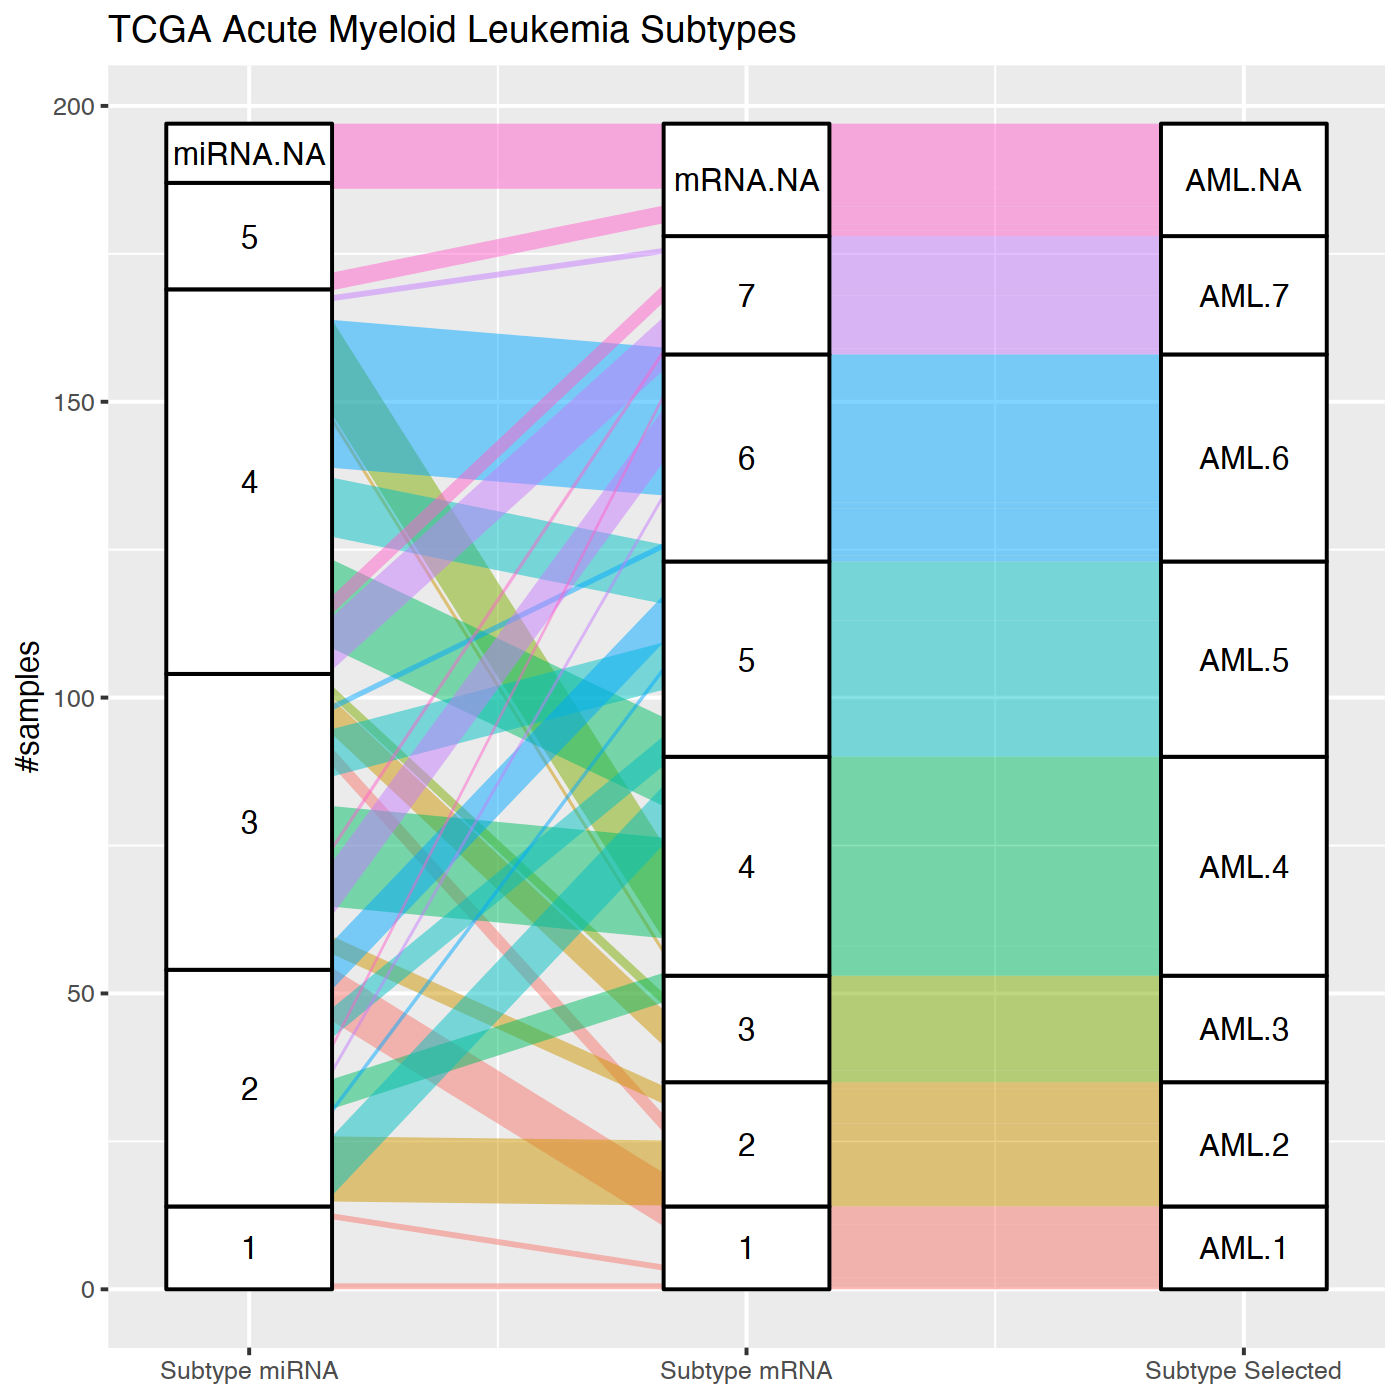

In [19]:
#NO
subtypes %>% 
    mutate(Subtype_miRNA=ifelse(is.na(Subtype_miRNA), 'miRNA.NA', Subtype_miRNA), # distinct groups for plotting 
           Subtype_mRNA=ifelse(is.na(Subtype_mRNA), 'mRNA.NA', Subtype_mRNA),
           Subtype_Selected=ifelse(is.na(Subtype_Selected), 'AML.NA', Subtype_Selected)) %>%
    group_by(Subtype_miRNA, Subtype_mRNA, Subtype_Selected) %>%
    summarise(nsamples=n()) %>%
    ggplot(aes(y=nsamples, axis1=Subtype_miRNA, axis2=Subtype_mRNA, 
                      axis3=Subtype_Selected)) +
      geom_alluvium(aes(fill=Subtype_Selected), width = 0, knot.pos = 0, reverse = FALSE) +
      guides(fill = FALSE) +
      geom_stratum(width = 1/3, reverse = FALSE) +
      geom_text(stat = "stratum", aes(label = after_stat(stratum)),
                reverse = FALSE) +
      scale_x_continuous(breaks = 1:3, labels = c("Subtype miRNA", "Subtype mRNA", "Subtype Selected")) +
      labs(title="TCGA Acute Myeloid Leukemia Subtypes", y="#samples")


- Most commonly used classification for TCGA-AML samples is based purely on gene expression data.
- Subtypes found based on miRNA and mRNA expression are widely different.
- There is no integrative classification available.

Can we "improve the classification" of samples by integrating both miRNA and mRNA expression data, as well as methylation data? 

## (3) Examine separate datatypes

In [62]:
# set color palettes we are going to use for subtype visualization
exp_subtypes_col = setNames(RColorBrewer::brewer.pal(name = "Set2", n = 4),
                            unique(na.omit(subtypes$Subtype_mRNA)))
DNAmeth_subtypes_col = setNames(RColorBrewer::brewer.pal(name = "Set2", n = 6),
                            unique(na.omit(subtypes$Subtype_DNAmeth)))
other_subtypes_col = setNames(RColorBrewer::brewer.pal(name = "Set2", n = 6),
                            unique(na.omit(subtypes$Subtype_other)))

In [63]:
exp_subtypes_col
DNAmeth_subtypes_col
other_subtypes_col

LGr4      LGr3      LGr1      LGr2 
"#66C2A5" "#FC8D62" "#8DA0CB" "#E78AC3"

LGm5      LGm4      LGm1      LGm6      LGm3      LGm2 
"#66C2A5" "#FC8D62" "#8DA0CB" "#E78AC3" "#A6D854" "#FFD92F"

Mesenchymal-like     Classic-like       G-CIMP-low         LGm6-GBM 
       "#66C2A5"        "#FC8D62"        "#8DA0CB"        "#E78AC3" 
           Codel      G-CIMP-high 
       "#A6D854"        "#FFD92F"

### I. Gene expression

In [50]:
exp_subtypes <- tibble(sample_codes=colnames(data_exp)) %>% 
    left_join(subtypes, by = "sample_codes") # extract rows in order of samples in 'data_exp'

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



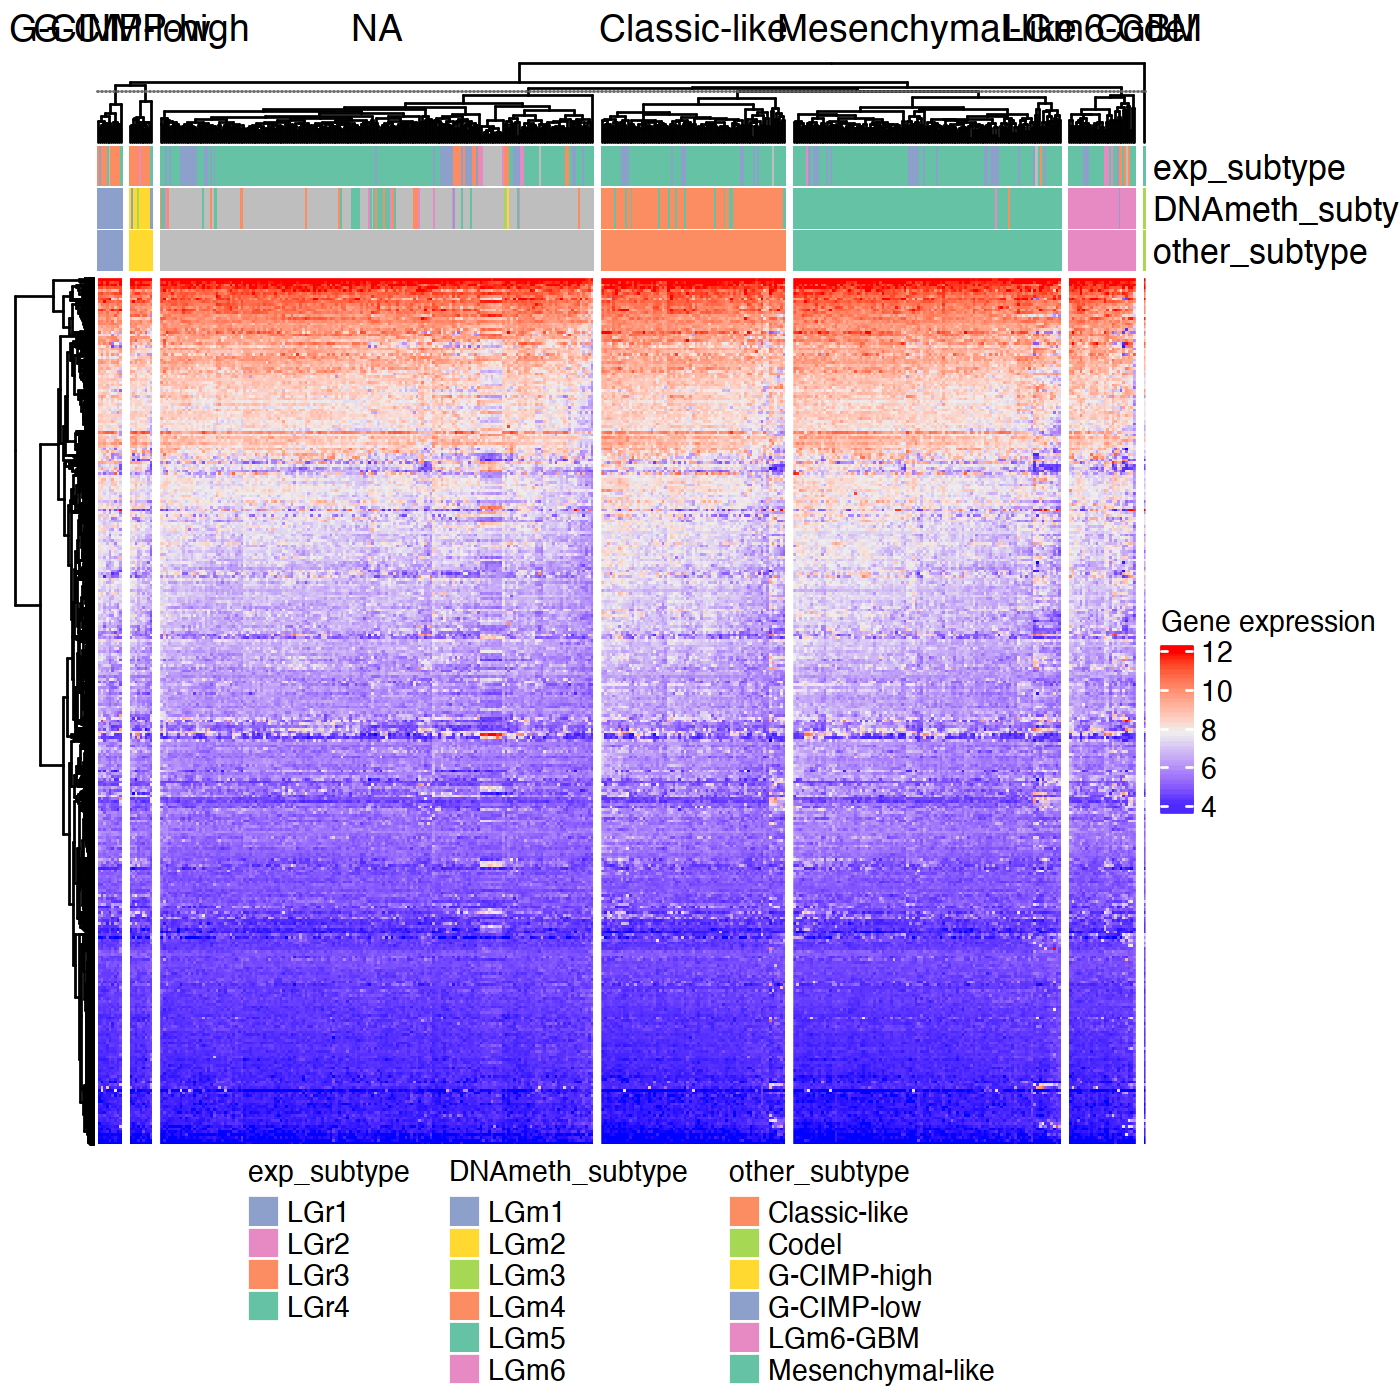

In [64]:
h <- Heatmap(as.matrix(data_exp), show_column_names = FALSE, show_row_names = FALSE, 
        top_annotation = HeatmapAnnotation(exp_subtype=as.factor(exp_subtypes$Subtype_mRNA),
                                           DNAmeth_subtype=as.factor(exp_subtypes$Subtype_DNAmeth),
                                           other_subtype=as.factor(exp_subtypes$Subtype_other),
                                          col = list(exp_subtype=exp_subtypes_col, 
                                                     DNAmeth_subtype=DNAmeth_subtypes_col,
                                                      other_subtype=other_subtypes_col)),
        column_split=as.factor(exp_subtypes$Subtype_other),
        name= "Gene expression")

draw(h, annotation_legend_side="bottom")
#this step can take a couple of minutes

Even though the subtypes were created using mRNA expression information, it is hard to notice any difference between samples. This is partially because we are looking at **raw read counts**. Some gene counts greatly dominate the data, which makes it hard to observe the expression patterns/trends. Because of this, for downstream analysis (such as visualization or clustering) it may be useful to work with transformed version of count data. Here we apply the most frequently used logarithmic transformation i.e.: y = log2(x+n), where x represent count values, and n an added positive constant (since count values for gene can be zero). The transformation also has an additional advantage of reducing the effect of outliers in the data.
!Here we can use VST or rlog transformation.

See [this](http://bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html#count-data-transformations) manual for more examples and discussion of count data transformation.

Additionally, we also apply a simple filter to remove non-informative features, defined as features with constant value in our set of samples.

In [38]:
#I have checked - zero variance already removed
preprocess.matrix <- function(data.matrix) {
  #num = log2(data.matrix + 1)
  should.keep = (apply(data.matrix, 1, function(x) sd(x, na.rm=TRUE)) != 0) # we remove non-informative features 
  return(data.matrix[should.keep,])
}
dim(data_exp)                       
data_exp_check <- preprocess.matrix(data_exp)
dim(data_exp_check)

[1] 12042   538

[1] 12042   538

In [36]:
#NO
#let's do also quantile normalization
library(limma)
preprocess.matrix.quant <- function(data.matrix) {
  num = normalizeBetweenArrays(log2(data.matrix + 1), method="quantile")
  should.keep = (apply(num, 1, function(x) sd(x, na.rm=TRUE)) != 0) # we remove non-informative features 
  return(num[should.keep,])
}                     
data_exp_tr_quant <- preprocess.matrix.quant(data_exp)
dim(data_exp_tr_quant)

[1] 20531   173

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


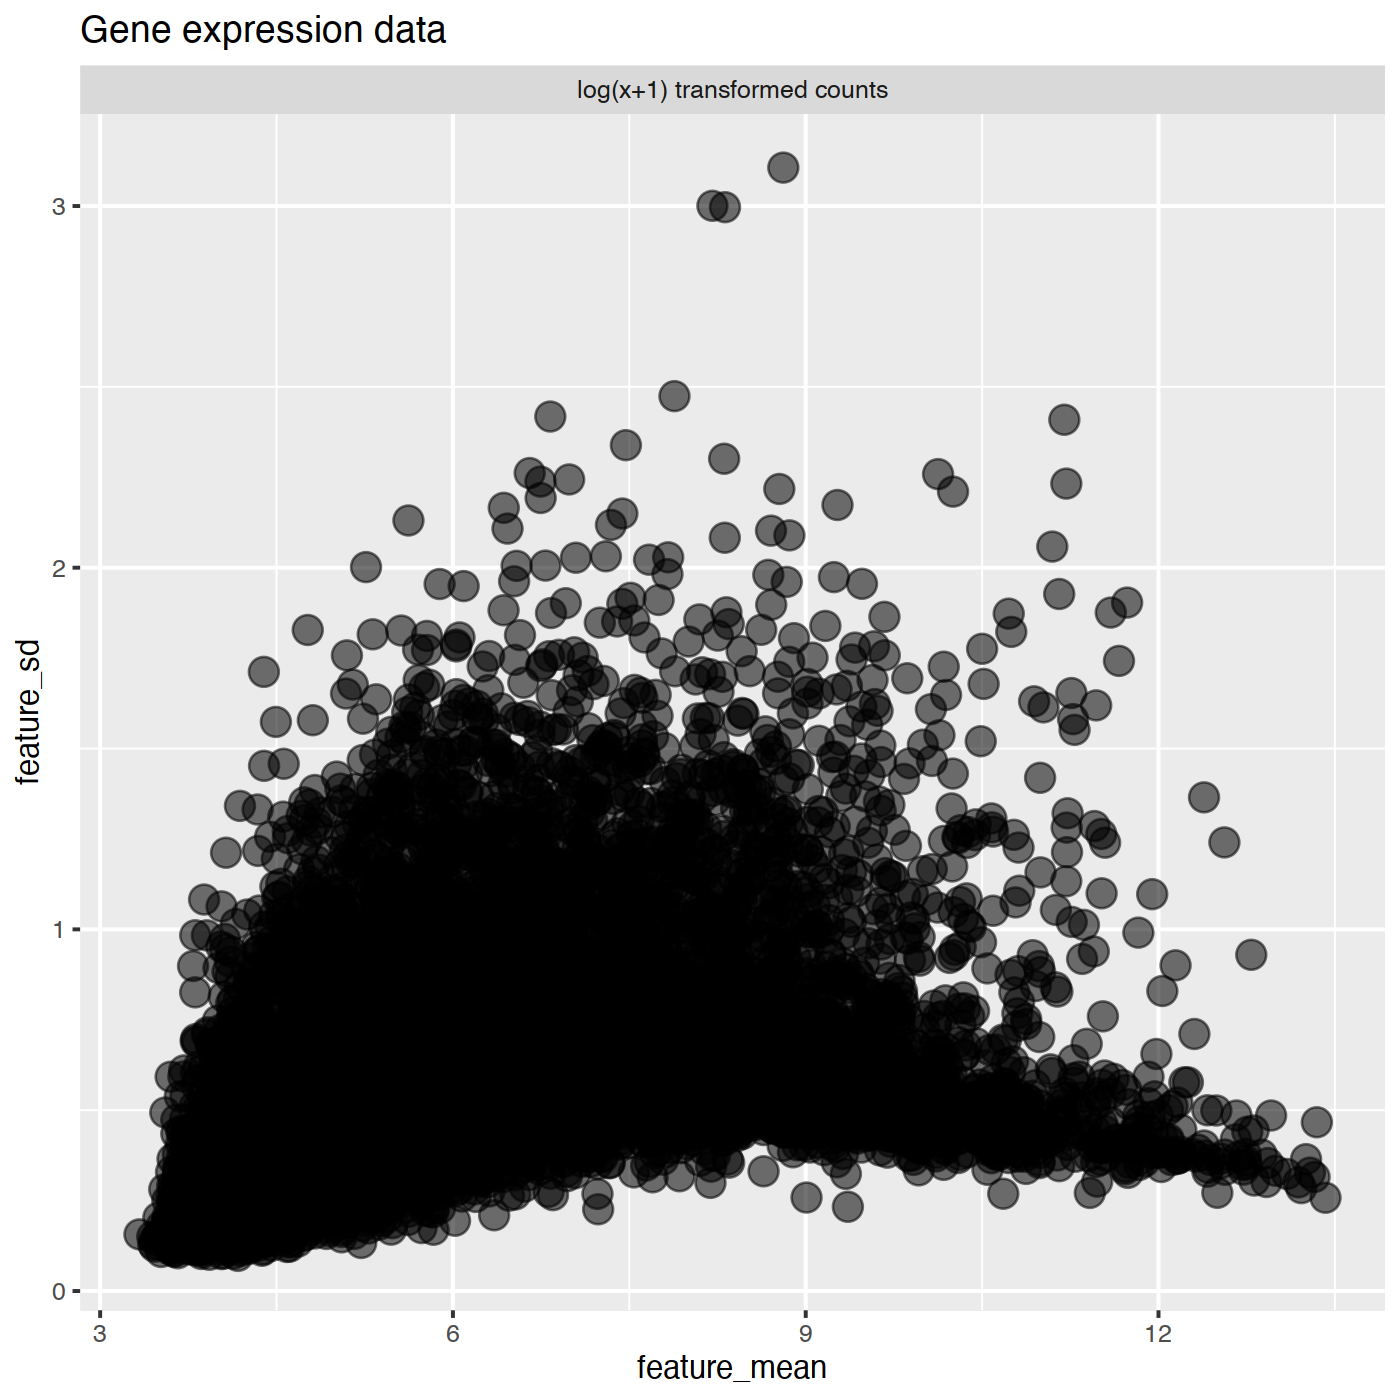

In [33]:
#Have checked - log2 normalized
tibble(feature_mean=c(rowMeans(data_exp, na.rm = TRUE)), 
       feature_sd=c(apply(data_exp, 1, function(x) sd(x, na.rm=TRUE))),
        data_matrix=c( 
                      rep("log(x+1) transformed counts", dim(data_exp)[1]))) %>%
    mutate(data_matrix=as.factor(data_matrix)) %>%
    ggplot() + 
        geom_point(aes(x=feature_mean, y=feature_sd, size=1, alpha=0.1)) + 
        facet_wrap(data_matrix~., scales="free", ncol=1) + 
        guides(size=FALSE, alpha=FALSE) +
        ggtitle("Gene expression data")

In [34]:
# Save transformed gene expression data (we are going to use it later)
# Just saved the same mRNA data
write.table(data_exp, file = file.path(data_dir_path, "exp_tr"), 
            row.names = TRUE, col.names = TRUE)

To further improve our visualization we apply additional z-score standardization to make the value of each feature in the data be zero-mean and unit variance. Z-score is calculated by subtracting the average gene abundance for each gene, and dividing that result by the standard deviation of all of the measured counts across all samples.

In [36]:
normalize.matrix <- function(data.matrix) {
  num = data.matrix - rowMeans(data.matrix, na.rm=TRUE)
  return((num / apply(num, 1, function(x) sd(x, na.rm=TRUE))))
}
data_exp_norm <- normalize.matrix(data_exp)

The automatically generated colors map from the minus and plus 99^th of
the absolute values in the matrix. There are outliers in the matrix
whose patterns might be hidden by this color mapping. You can manually
set the color to `col` argument.

Use `suppressMessages()` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



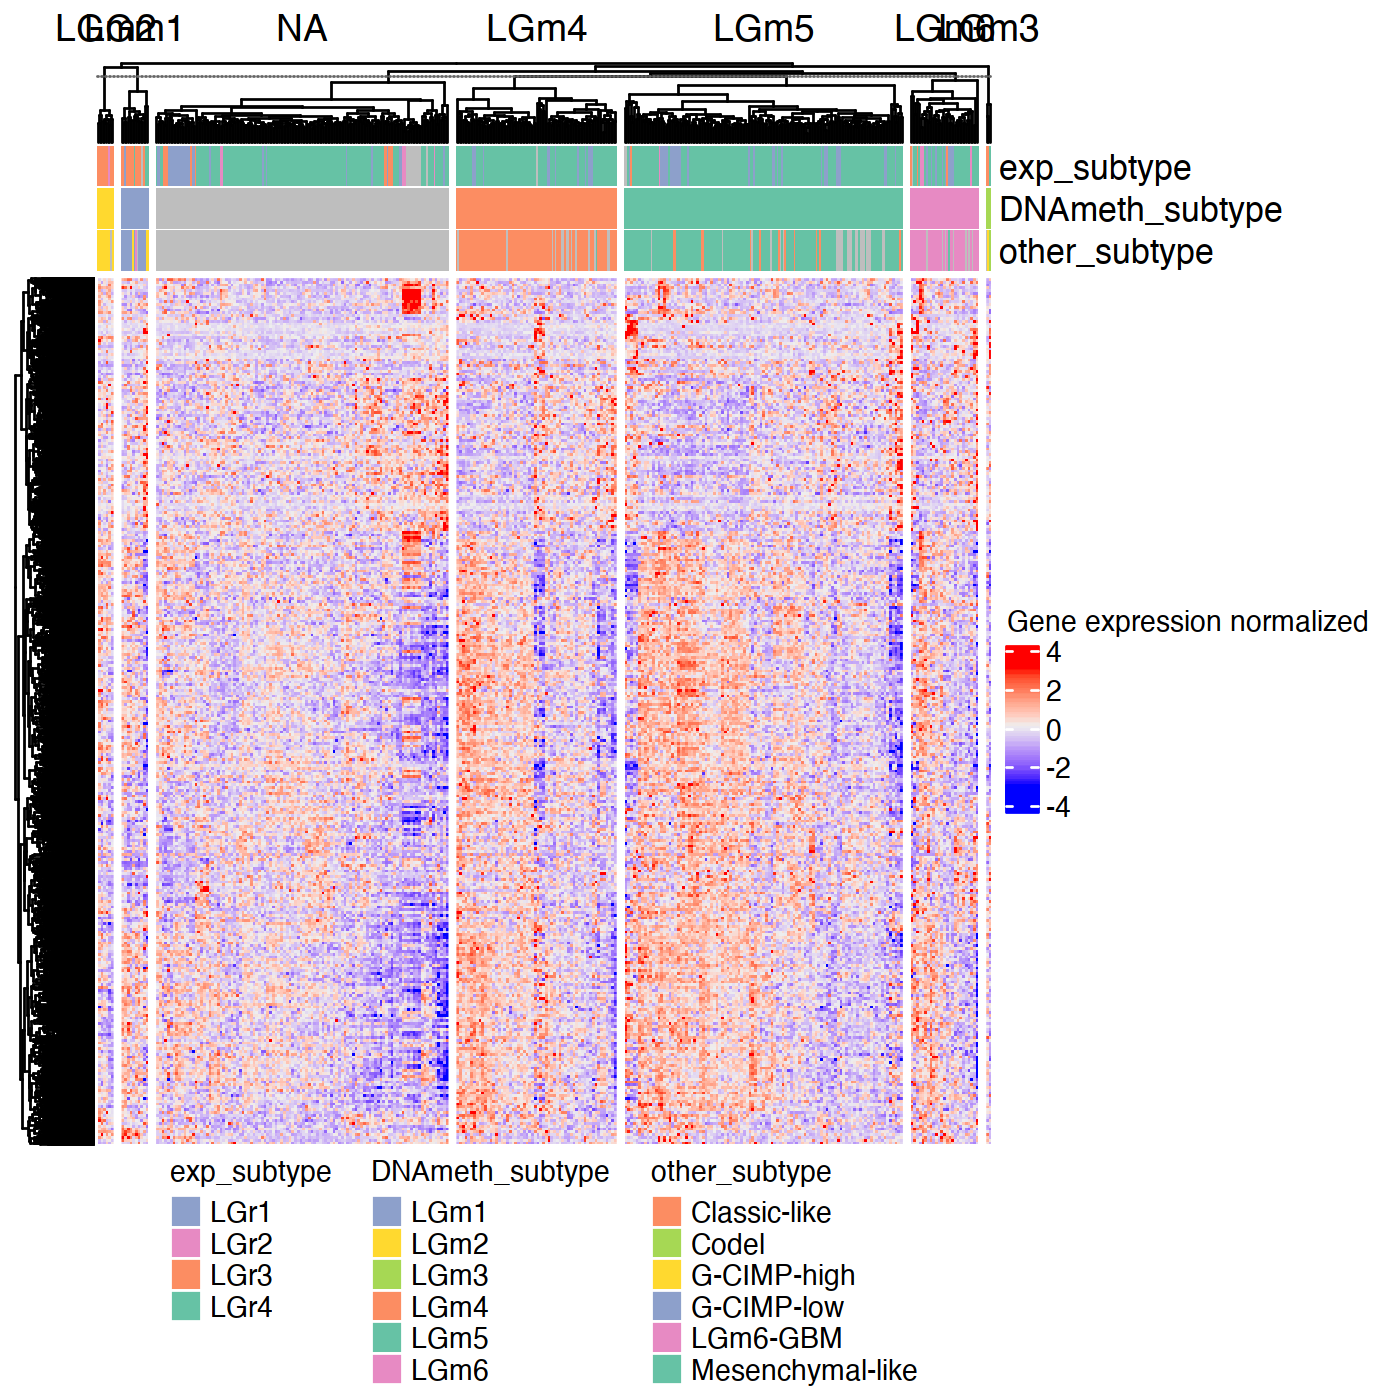

In [68]:
h <- Heatmap(as.matrix(data_exp_norm), show_column_names = FALSE, show_row_names = FALSE, 
        top_annotation = HeatmapAnnotation(exp_subtype=as.factor(exp_subtypes$Subtype_mRNA),
                                           DNAmeth_subtype=as.factor(exp_subtypes$Subtype_DNAmeth),
                                           other_subtype=as.factor(exp_subtypes$Subtype_other),
                                          col = list(exp_subtype=exp_subtypes_col, 
                                                     DNAmeth_subtype=DNAmeth_subtypes_col,
                                                      other_subtype=other_subtypes_col)),
        column_split=as.factor(exp_subtypes$Subtype_DNAmeth),
        name= "Gene expression normalized")

draw(h, annotation_legend_side="bottom")
#this step can take a couple of minutes


### II. microRNA expression

In [69]:
mirna_subtypes <- tibble(sample_codes=colnames(data_mirna)) %>% 
    left_join(subtypes, by = "sample_codes") # extract rows in order of samples in 'data_mirna'

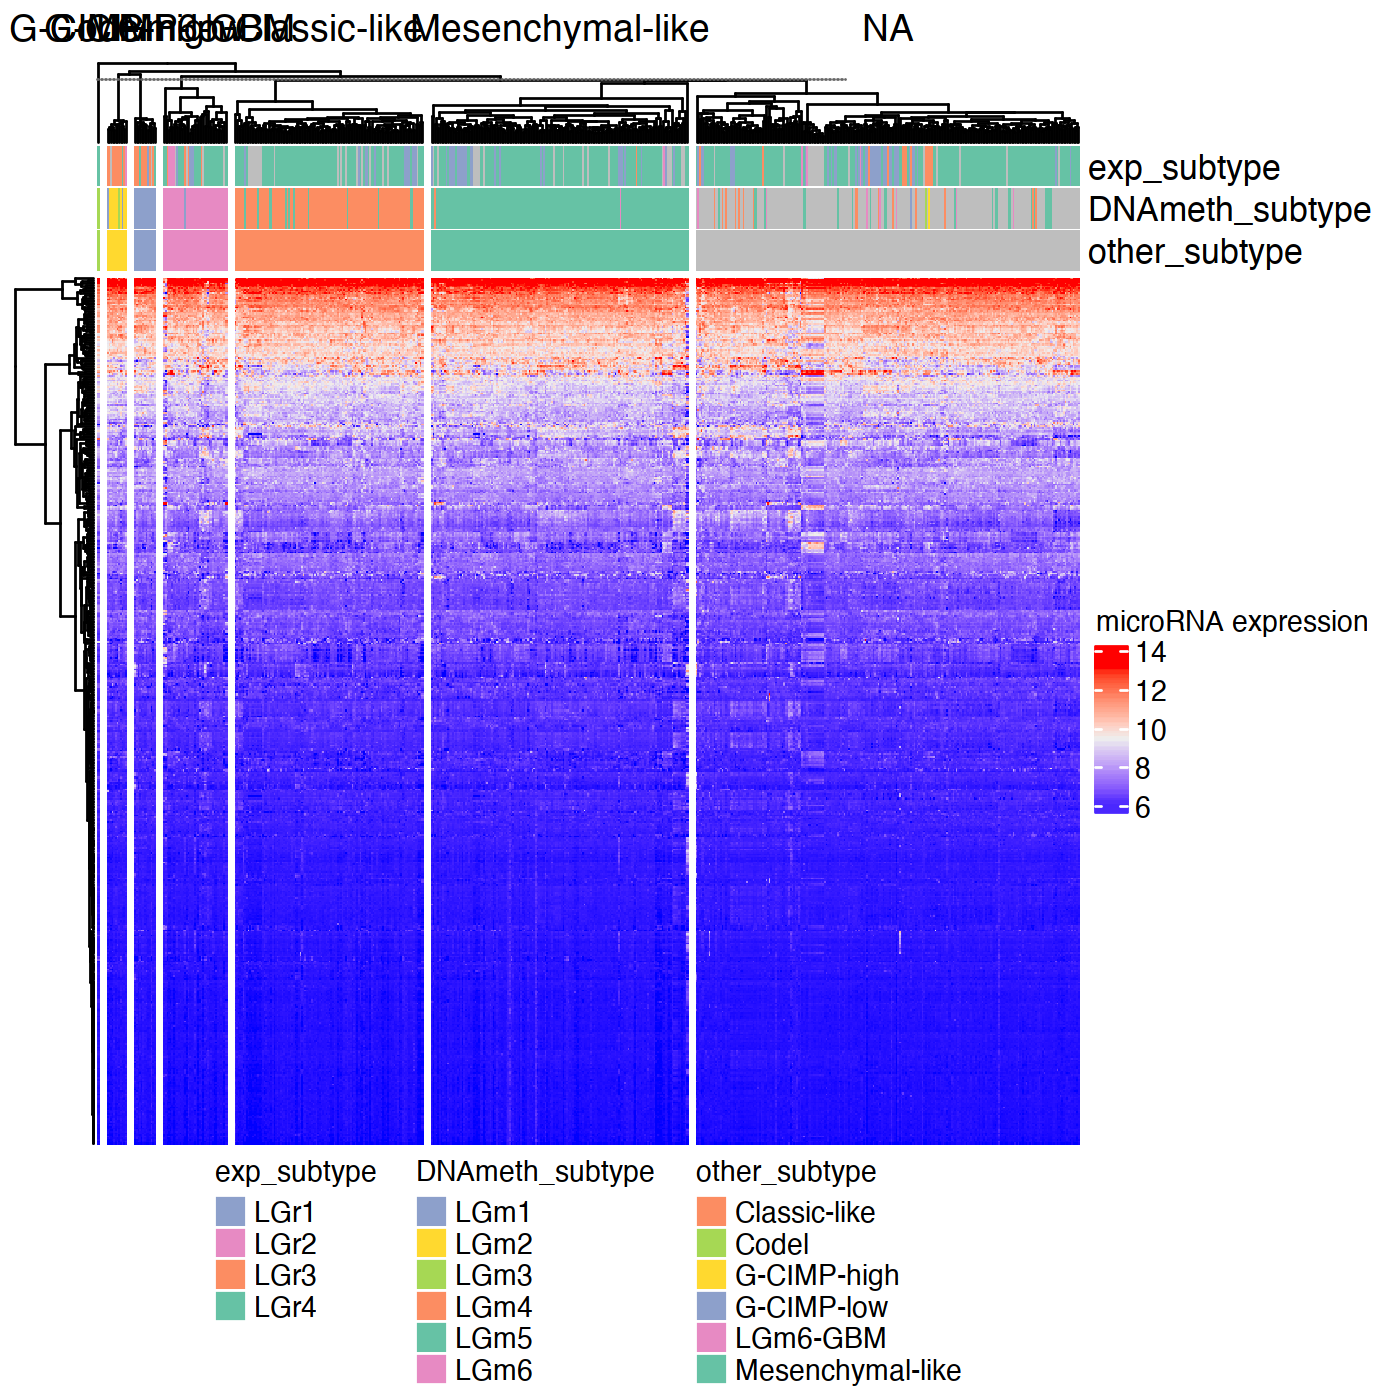

In [70]:
#Split by other
h <- Heatmap(as.matrix(data_mirna), show_column_names = FALSE, show_row_names = FALSE, 
        top_annotation = HeatmapAnnotation(exp_subtype=as.factor(mirna_subtypes$Subtype_mRNA),
                                           DNAmeth_subtype=as.factor(mirna_subtypes$Subtype_DNAmeth),
                                           other_subtype=as.factor(mirna_subtypes$Subtype_other),
                                          col = list(exp_subtype=exp_subtypes_col, 
                                                     DNAmeth_subtype=DNAmeth_subtypes_col,
                                                      other_subtype=other_subtypes_col)),
        column_split=as.factor(mirna_subtypes$Subtype_other),
        name= "microRNA expression")

draw(h, annotation_legend_side="bottom")


As with gene expression, we apply the log(x+1) transformation to raw counts.

In [71]:
# Zero variance removed - checked
dim(data_mirna)                       
data_mirna_check <- preprocess.matrix(data_mirna) 
dim(data_mirna_check)

[1] 534 575

[1] 534 575

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


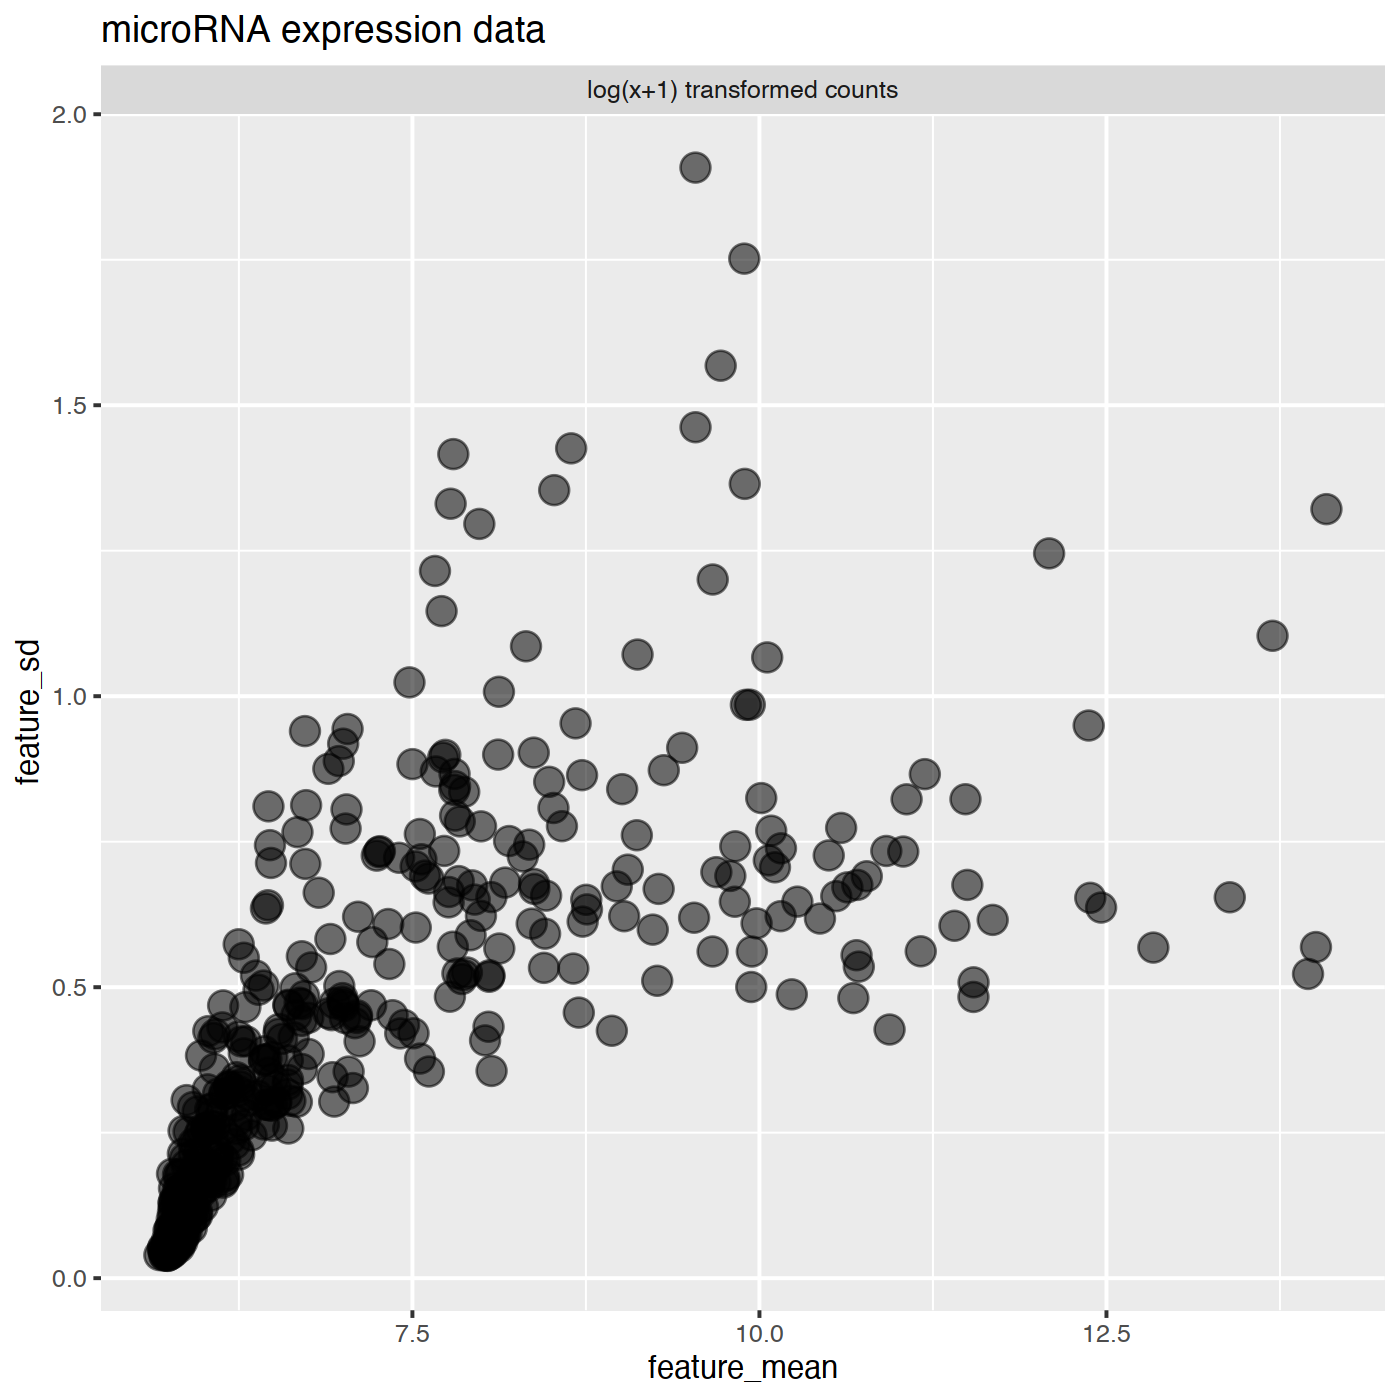

In [74]:
tibble(feature_mean=c(rowMeans(data_mirna, na.rm = TRUE)), 
       feature_sd=c(apply(data_mirna, 1, function(x) sd(x, na.rm=TRUE))),     
        data_matrix=c(rep("log(x+1) transformed counts", dim(data_mirna)[1]))) %>%
    mutate(data_matrix=as.factor(data_matrix)) %>%
    ggplot() + 
        geom_point(aes(x=feature_mean, y=feature_sd, size=1, alpha=0.1)) + 
        facet_wrap(data_matrix~., scales="free", ncol=1) + 
        guides(size=FALSE, alpha=FALSE) +
        ggtitle("microRNA expression data")

In [83]:
#Save transformed microRNA expression data (we are going to use it later)
write.table(data_mirna, file = file.path(data_dir_path, "mirna_tr"), 
            row.names = TRUE, col.names = TRUE)

Again, let's apply the z-score normailzation to improve our visualization.

In [75]:
data_mirna_norm <- normalize.matrix(data_mirna)   

The automatically generated colors map from the minus and plus 99^th of
the absolute values in the matrix. There are outliers in the matrix
whose patterns might be hidden by this color mapping. You can manually
set the color to `col` argument.

Use `suppressMessages()` to turn off this message.



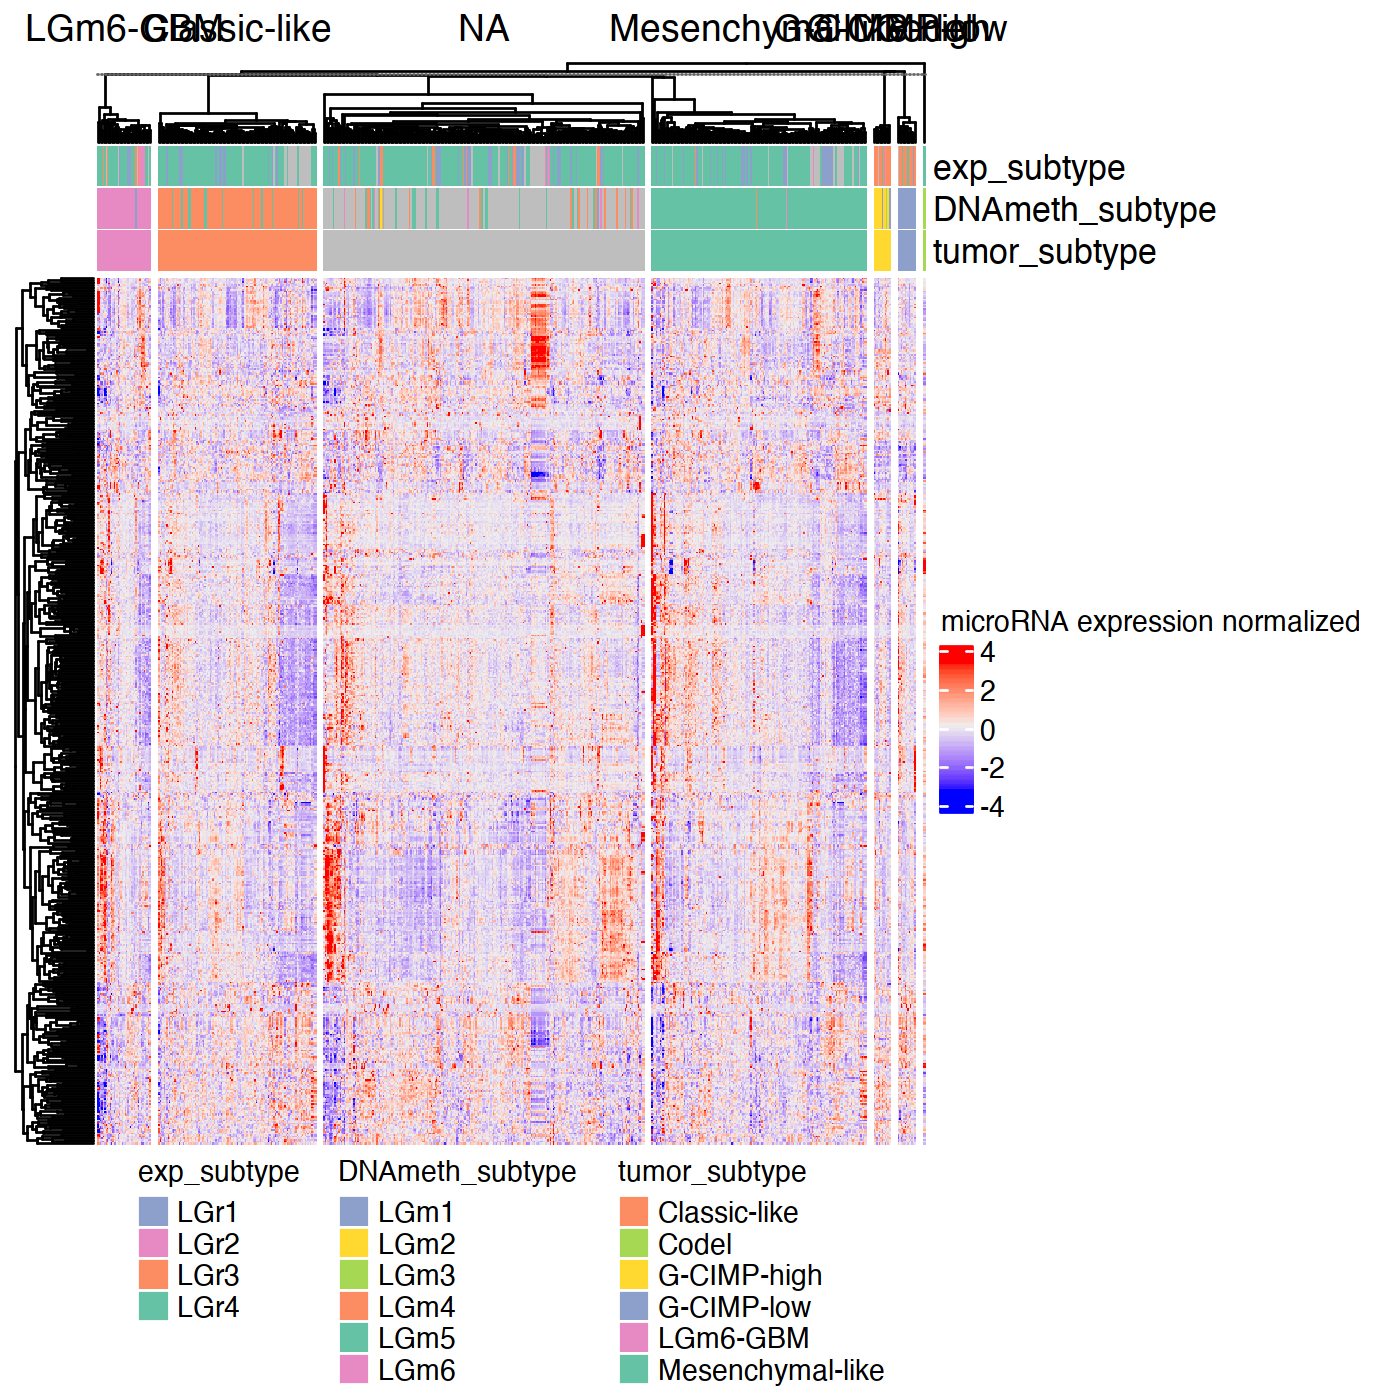

In [76]:
h <- Heatmap(as.matrix(data_mirna_norm), show_column_names = FALSE, show_row_names = FALSE, 
        top_annotation = HeatmapAnnotation(exp_subtype=as.factor(mirna_subtypes$Subtype_mRNA),
                                           DNAmeth_subtype=as.factor(mirna_subtypes$Subtype_DNAmeth),
                                           tumor_subtype=as.factor(mirna_subtypes$Subtype_other),
                                          col = list(exp_subtype=exp_subtypes_col, 
                                                     DNAmeth_subtype=DNAmeth_subtypes_col,
                                                      tumor_subtype=other_subtypes_col)),
        column_split=as.factor(mirna_subtypes$Subtype_other),
        name= "microRNA expression normalized")
draw(h, annotation_legend_side="bottom")

### III. DNA methylation

In [77]:
met_subtypes <- tibble(sample_codes=colnames(data_met)) %>% 
    left_join(subtypes, by = "sample_codes") # extract rows in order of samples in 'data_met'

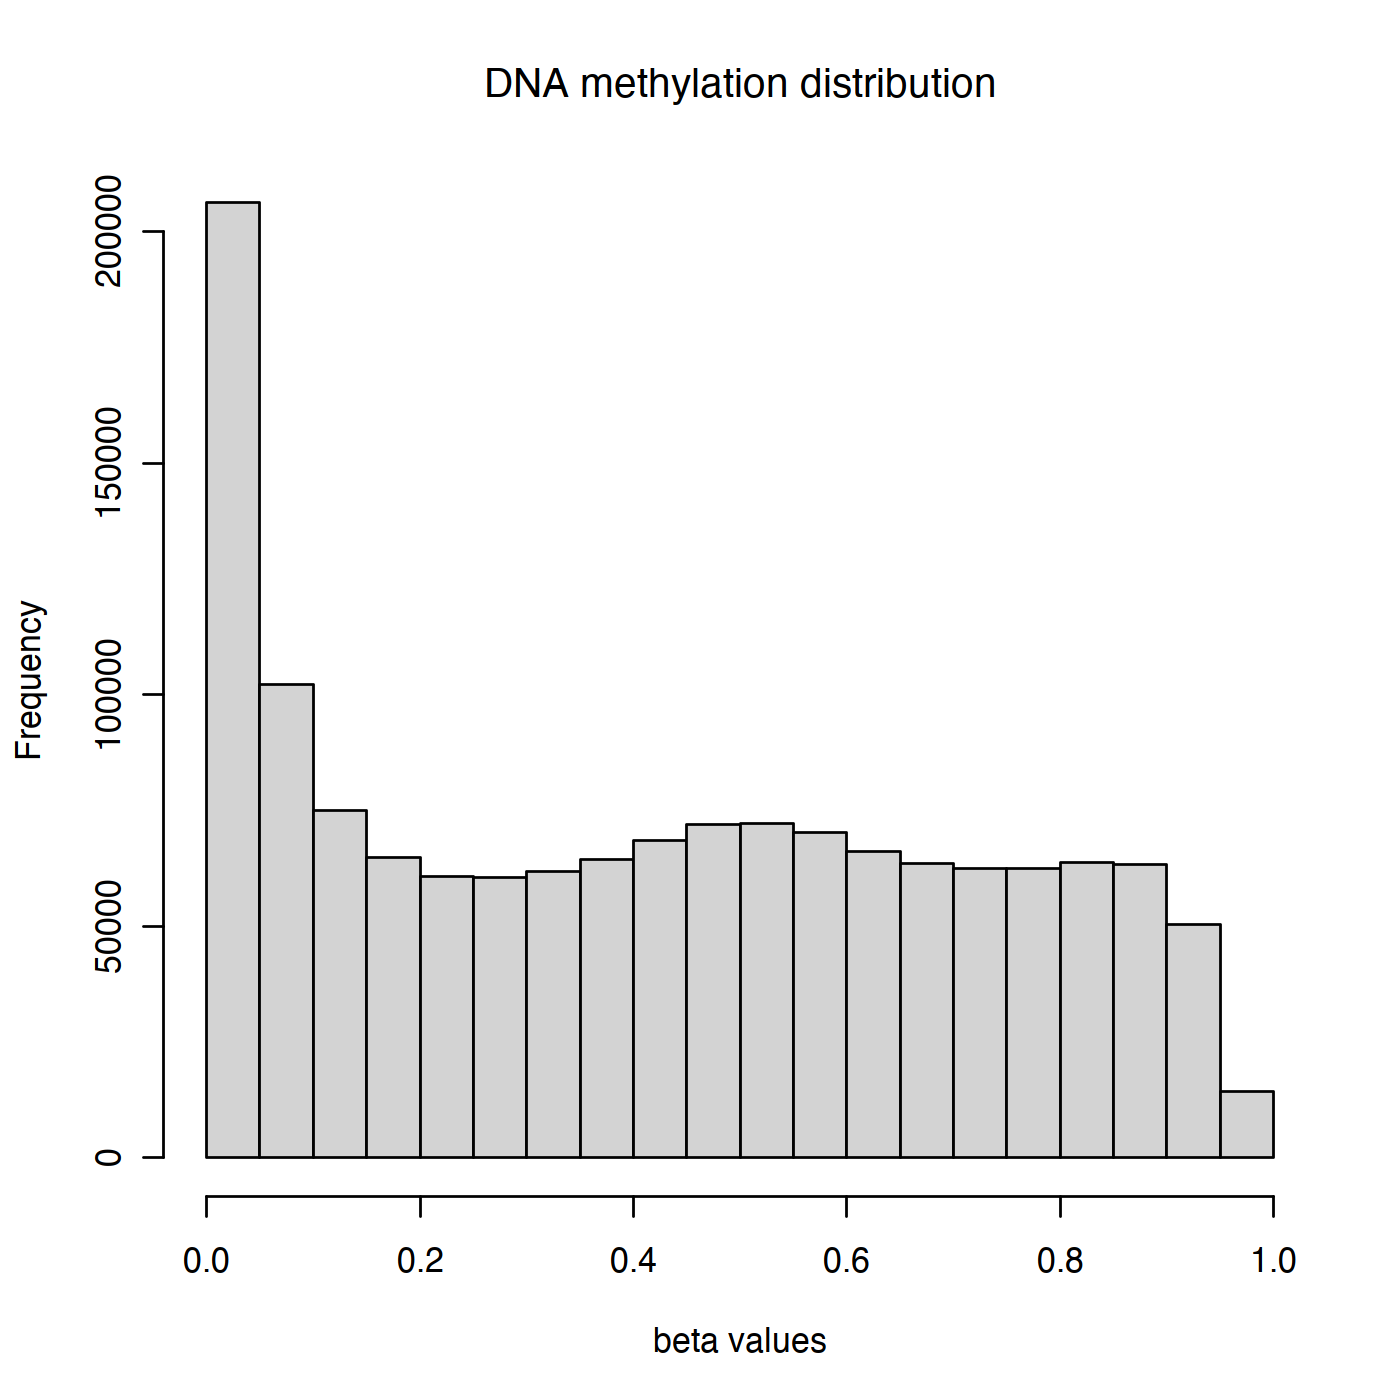

In [78]:
hist(as.vector(as.matrix(data_met)), main= "DNA methylation distribution", xlab="beta values")

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



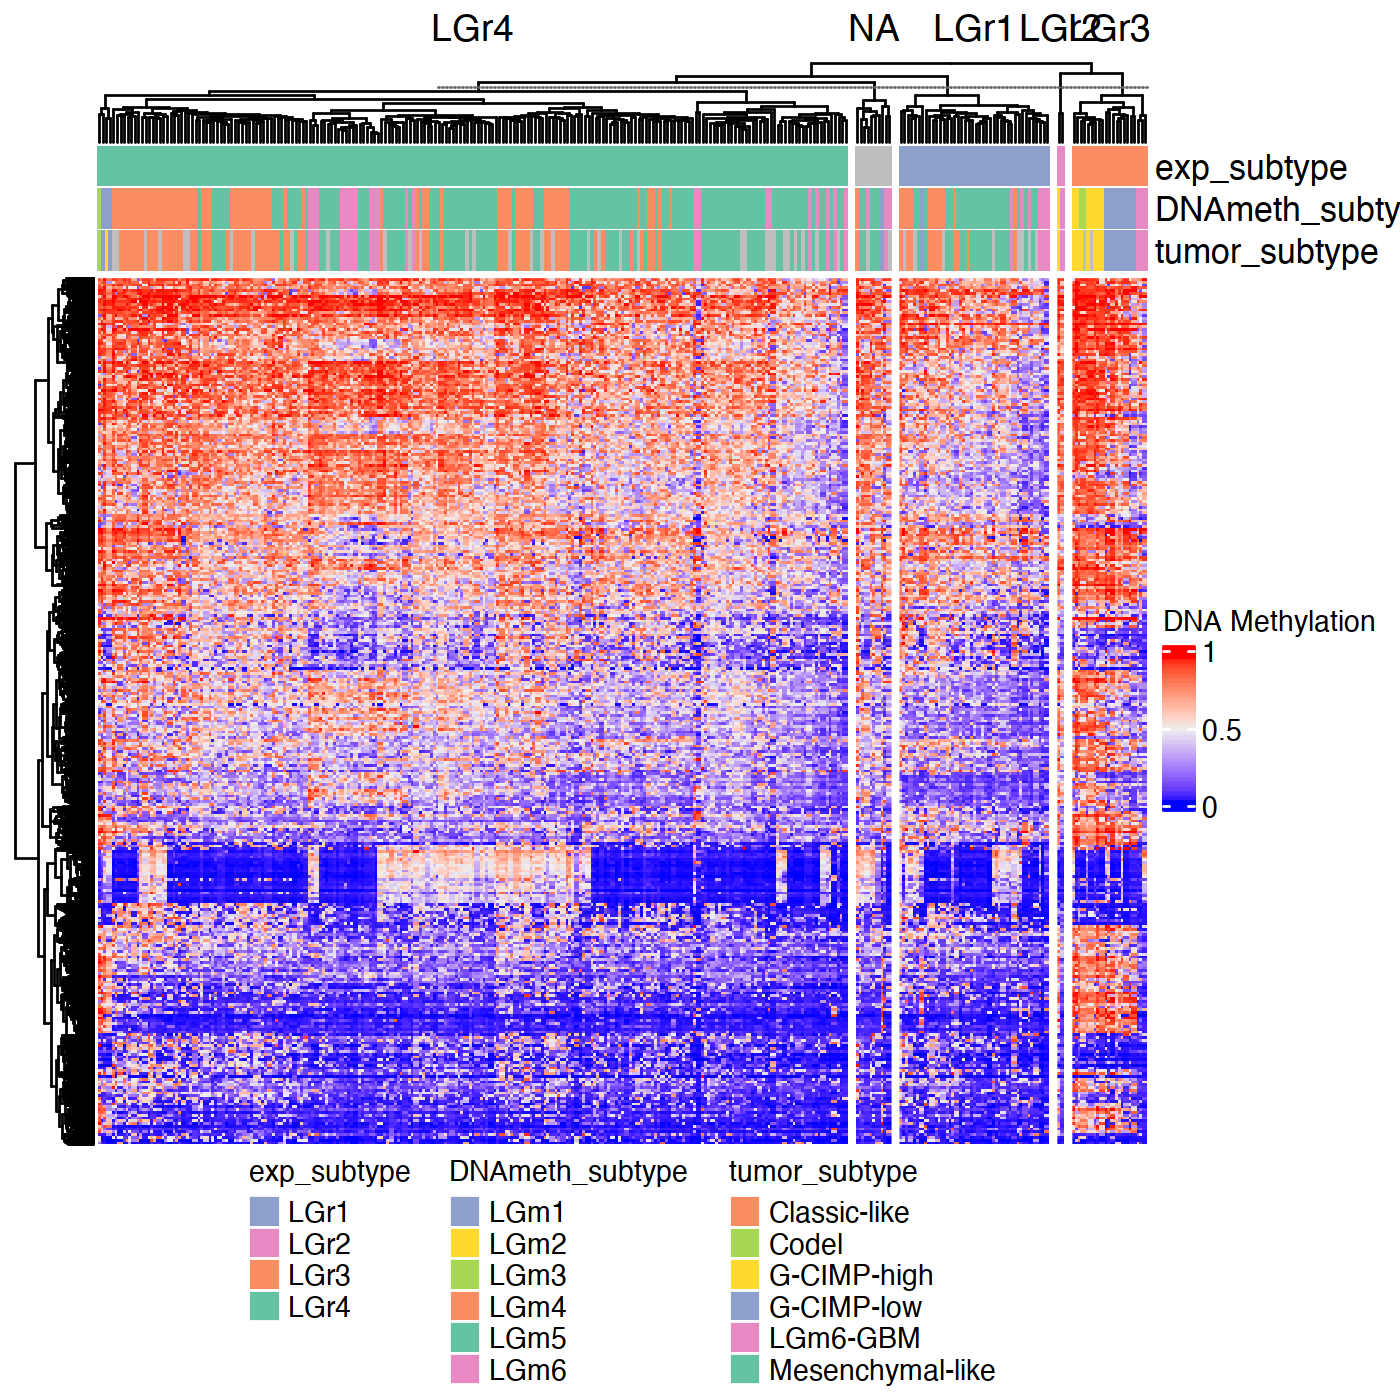

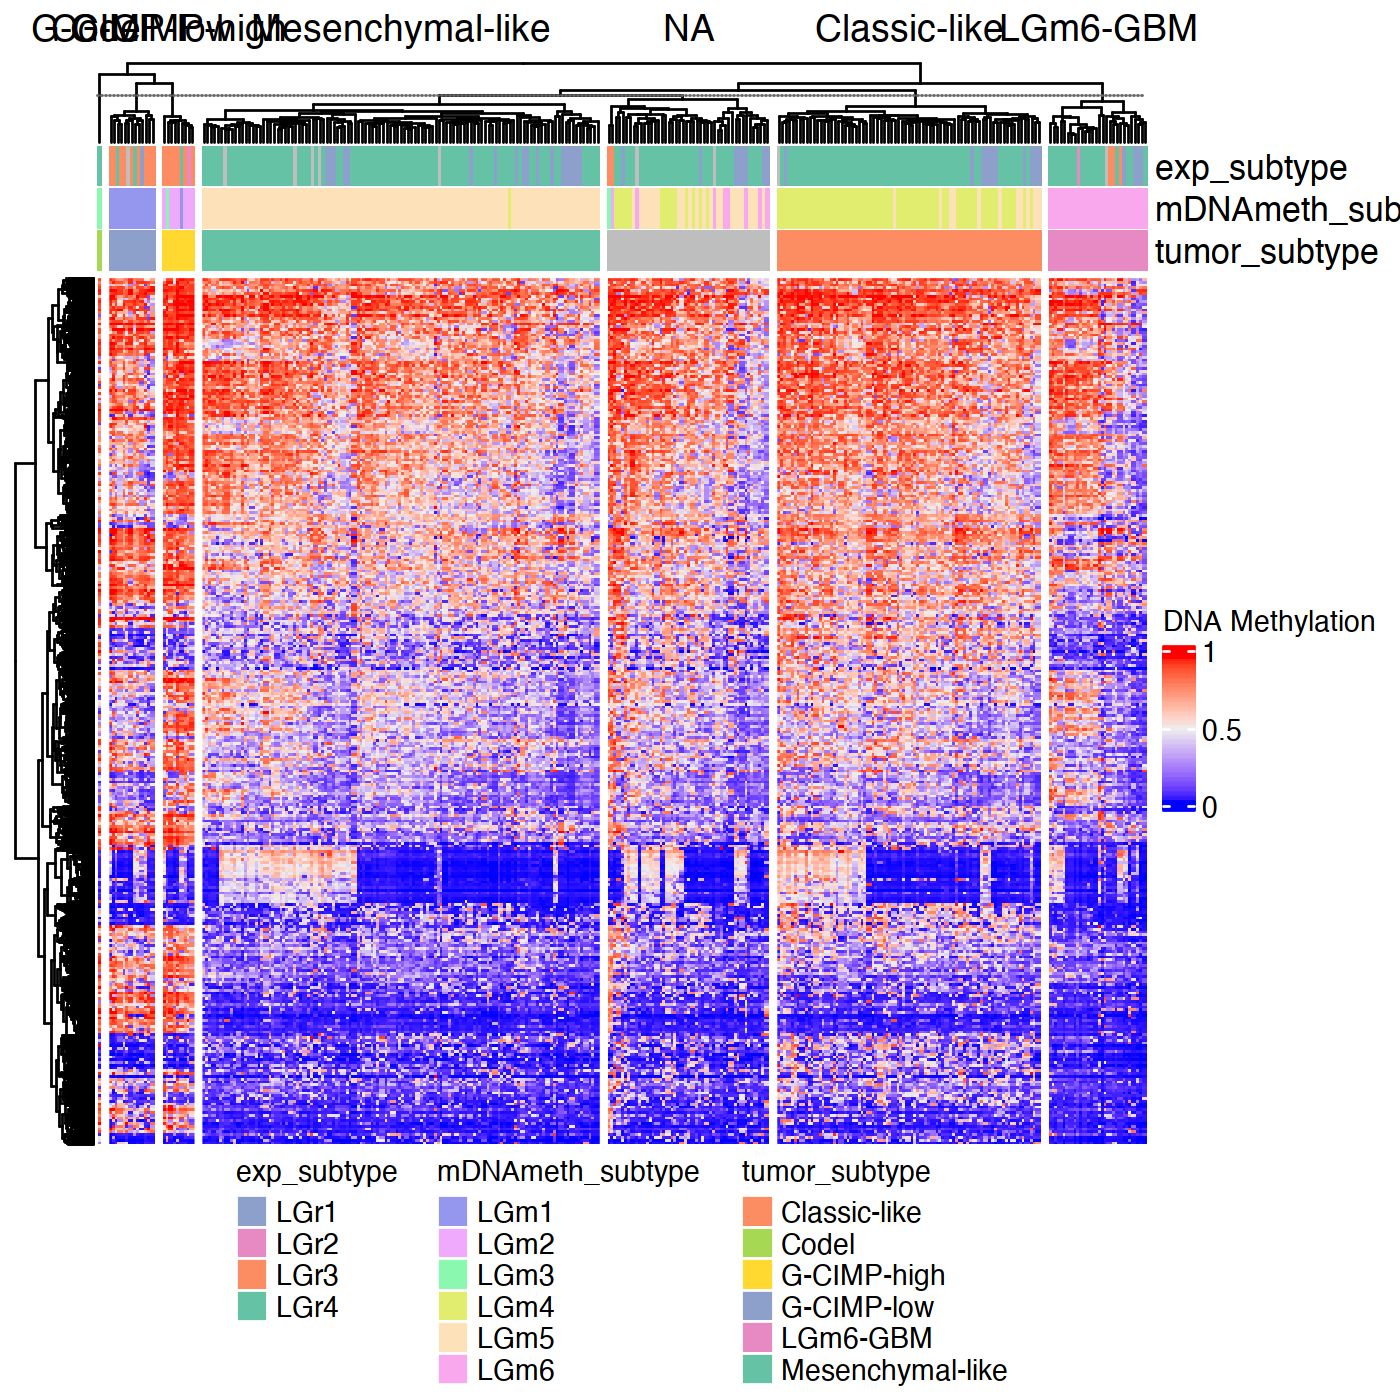

In [80]:
h1 <- Heatmap(as.matrix(data_met), show_column_names = FALSE, show_row_names = FALSE, 
        top_annotation = HeatmapAnnotation(exp_subtype=as.factor(met_subtypes$Subtype_mRNA),
                                           DNAmeth_subtype=as.factor(met_subtypes$Subtype_DNAmeth),
                                           tumor_subtype=as.factor(met_subtypes$Subtype_other),
                                          col = list(exp_subtype=exp_subtypes_col, 
                                                     DNAmeth_subtype=DNAmeth_subtypes_col,
                                                      tumor_subtype=other_subtypes_col)),
        column_split=as.factor(met_subtypes$Subtype_mRNA),
        name= "DNA Methylation")
h2 <- Heatmap(as.matrix(data_met), show_column_names = FALSE, show_row_names = FALSE, 
        top_annotation = HeatmapAnnotation(exp_subtype=as.factor(met_subtypes$Subtype_mRNA),
                                          DNAmeth_subtype=as.factor(met_subtypes$Subtype_DNAmeth),
                                           tumor_subtype=as.factor(met_subtypes$Subtype_other),
                                          col = list(exp_subtype=exp_subtypes_col, 
                                                     DNAmeth_subtype=DNAmeth_subtypes_col,
                                                      tumor_subtype=other_subtypes_col)),
        column_split=as.factor(met_subtypes$Subtype_other),
        name= "DNA Methylation")
draw(h1, annotation_legend_side="bottom")
draw(h2, annotation_legend_side="bottom")

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



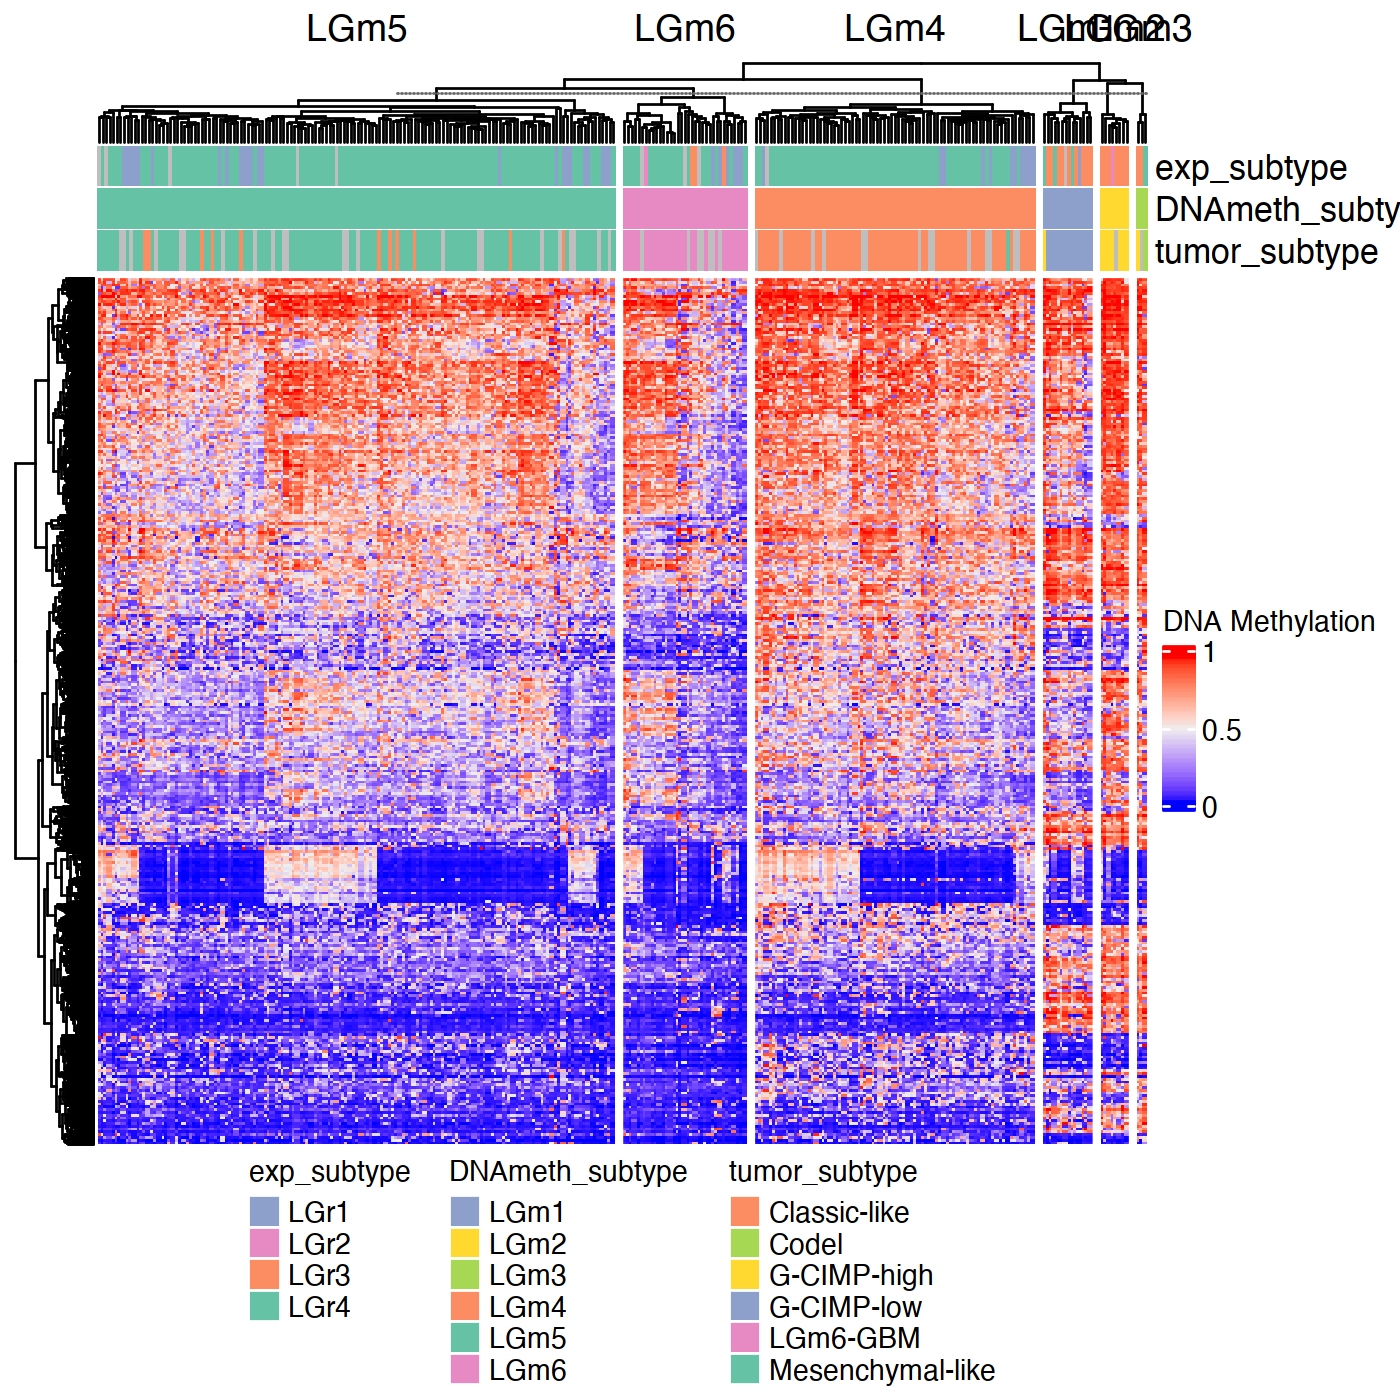

In [82]:
h <- Heatmap(as.matrix(data_met), show_column_names = FALSE, show_row_names = FALSE, 
        top_annotation = HeatmapAnnotation(exp_subtype=as.factor(met_subtypes$Subtype_mRNA),
                                          DNAmeth_subtype=as.factor(met_subtypes$Subtype_DNAmeth),
                                           tumor_subtype=as.factor(met_subtypes$Subtype_other),
                                          col = list(exp_subtype=exp_subtypes_col, 
                                                     DNAmeth_subtype=DNAmeth_subtypes_col,
                                                      tumor_subtype=other_subtypes_col)),
        column_split=as.factor(met_subtypes$Subtype_DNAmeth),
        name= "DNA Methylation")
draw(h, annotation_legend_side="bottom")